In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

In [23]:
np.random.seed(2000)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

class Matrix:
    def __init__(self, cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
        self.cm = cm
        self.classes = classes
        self.normalize = normalize
        self.title = title
        self.cmap = cmap
    
    def plot_confusion_matrix(self):
        """
        This function prints and plots the confusion matrix.
        """
        cm = self.cm
        if self.normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.figure(figsize=(5, 5))
        plt.imshow(cm, interpolation='nearest', cmap=self.cmap)
        plt.title(self.title, size=24)
        plt.colorbar(aspect=4)
        tick_marks = np.arange(len(self.classes))
        plt.xticks(tick_marks, self.classes, rotation=45, size=14)
        plt.yticks(tick_marks, self.classes, size=14)

        fmt = '.2f' if self.normalize else 'd'
        thresh = cm.max() / 2.

        # Labeling the plot
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label', size=18)
        plt.xlabel('Predicted label', size=18)


# Titanic Dataset

https://www.kaggle.com/competitions/titanic/data

In [ ]:
train = pd.read_csv("/Machine_Learning/Hand_On_ML/titanic_dataset/train.csv", index_col = 0)
test = pd.read_csv("/Machine_Learning/Hand_On_ML/titanic_dataset/test.csv", index_col = 0)

# Exploratory data Analysis

In [26]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Rate of missing values.
train.isnull().sum()/train.shape[0]

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [28]:
# Let's drop the column Cabin (too much missing values)
train.drop('Cabin', axis= 1, inplace = True)

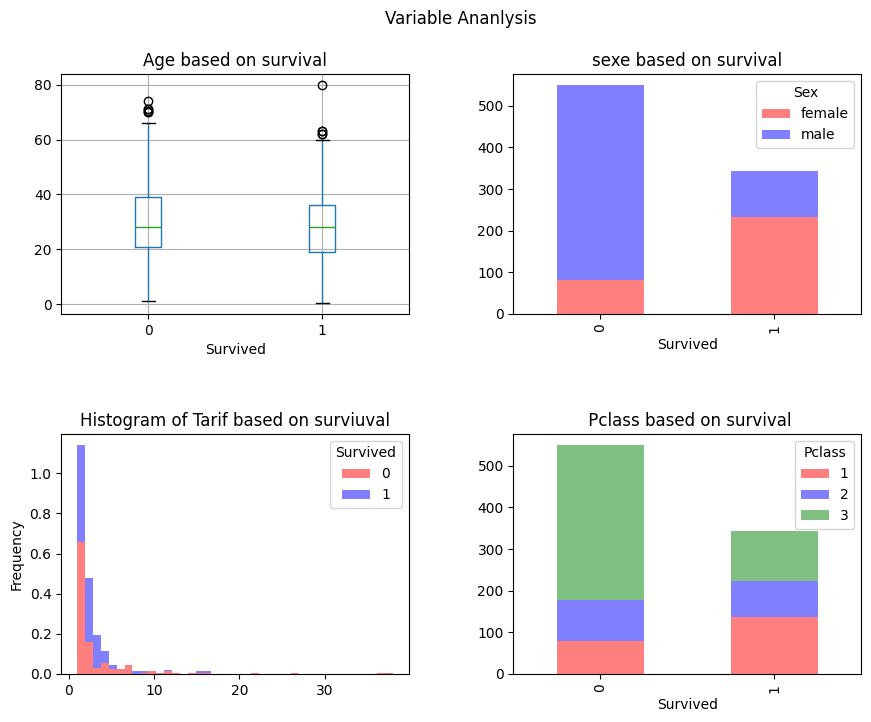

In [29]:
# Display a figure

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#Box plot of age with respect to survival.
train.boxplot(column='Age', by='Survived', ax=axs[0,0] )
axs[0,0].set_title('Age based on survival')
#Box plot of sex with respect to survival.
train.groupby(['Survived', 'Sex'])['Survived'].count().unstack().plot(kind='bar', stacked=True, color=['red', 'blue'],alpha = 0.5, ax =axs[0,1]) 
axs[0,1].set_title("sexe based on survival")

# Histogram tarif by survival
train.groupby(['Fare', 'Survived'])['Fare'].count().unstack().plot(kind='hist', alpha =0.5, bins= 40, color= ['red', 'blue'], stacked =True, ax= axs[1,0], density=True)
axs[1,0].set_title("Histogram of Tarif based on surviuval")
##Box plot of survival by class.
train.groupby(['Survived', 'Pclass'])['Survived'].count().unstack().plot(kind='bar', stacked=True, color= ['red', 'blue', 'green'], alpha=0.5, ax=axs[1,1])
axs[1,1].set_title(" Pclass based on survival")

# Ajust space between the figures
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig.suptitle("Variable Ananlysis")
plt.show()

The charts indicate that survival on the Titanic was strongly influenced by gender and passenger class. Women had a much higher survival rate than men, and first-class passengers were more likely to survive compared to those in second and third class. Although most passengers paid lower fares, there is no clear correlation between fare and survival. Age does not appear to be a decisive factor either, as both survivors and non-survivors had a similar age distribution with a median around 30 years. Overall, gender and class played the most significant roles in determining survival.

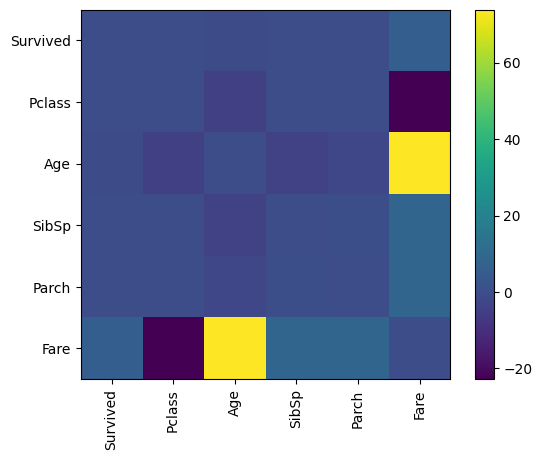

In [30]:
# Select only numeric columns from the DataFrame
numeric_train = train.select_dtypes(include=['number'])

# Compute covariance matrix
cov = numeric_train.cov()
for i in range(cov.shape[0]):
    cov.iloc[i,i] = 0

plt.figure()
plt.imshow(cov, cmap='viridis', interpolation='nearest')
plt.xticks(range(len(numeric_train.columns)), numeric_train.columns, rotation=90)
plt.yticks(range(len(numeric_train.columns)), numeric_train.columns)
plt.colorbar()
plt.show()


**FEATURE ENGINEERING**

In [31]:
Train_first = train.copy()

In [32]:
train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
# Normalization of 'Fare' column
train['Fare'] = (train['Fare'] - train['Fare'].mean()) / train['Fare'].std()
# Normalization of 'Age' column
train['Age'] = (train['Age'] - train['Age'].mean()) / train['Age'].std()
# Replace NaN in 'Age' with the mean of the column (no inplace=True)
train['Age'] = train['Age'].fillna(train['Age'].mean())
# Replace NaN in 'Embarked' with the most frequent value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])

# Drop 'Name' and 'Ticket' columns
train.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [34]:
# Encoding variables
# Assume `train` is your DataFrame
train = pd.get_dummies(train, columns=['Sex', 'Pclass', 'Embarked'])
# Drop the first dummy variable for each categorical feature to avoid dummy variable trap
train.drop(['Sex_female', 'Pclass_2', 'Embarked_C'], axis=1, inplace=True)
# Rename the remaining columns for clarity
train.rename(columns={'Sex_male': 'Sex'}, inplace=True)
# Convert the boolean columns to integers (0s and 1s)
boolean_cols = train.select_dtypes(include='bool').columns
train[boolean_cols] = train[boolean_cols].astype(int)

# Display the updated DataFrame
print(train.head())


             Survived       Age  SibSp  Parch      Fare  Sex  Pclass_1  \
PassengerId                                                              
1                   0 -0.530005      1      0 -0.502163    1         0   
2                   1  0.571430      1      0  0.786404    0         1   
3                   1 -0.254646      0      0 -0.488580    0         0   
4                   1  0.364911      1      0  0.420494    0         1   
5                   0  0.364911      0      0 -0.486064    1         0   

             Pclass_3  Embarked_Q  Embarked_S  
PassengerId                                    
1                   1           0           1  
2                   0           0           0  
3                   1           0           1  
4                   0           0           1  
5                   1           0           1  


## Benchemerks

## Linear Models



/home/bedoo/Machine_Learning/ML/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


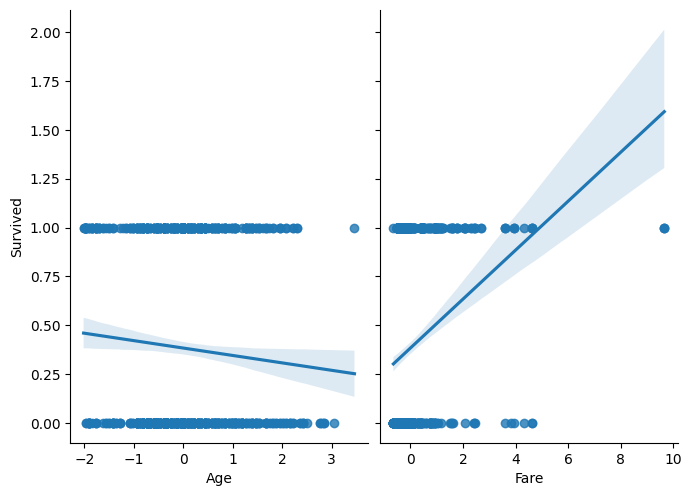

In [35]:
sns.pairplot(train, x_vars=['Age', 'Fare'], y_vars='Survived', height=7, aspect=0.7, kind='reg', size=5 )

best Threshold :  [0.63157895]
Misclassification error:  18.41 %


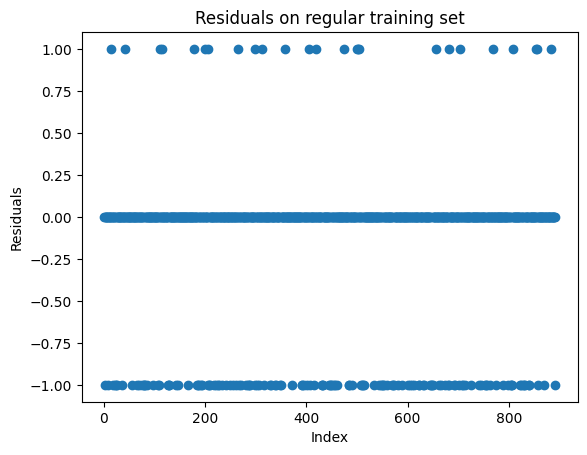

In [36]:
from sklearn.linear_model import LinearRegression

reg_lineaire = LinearRegression()

# let fit the model to the training data
reg_lineaire.fit(train.drop(['Survived'], axis=1), train['Survived'])

# Cross validation application with k=10
S = np.linspace(0,1,20)
K = np.arange(1,10)
acc = np.zeros((len(S), len(K)))
for j in K:
    # Index of the validation set
    ind = np.random.randint(0, 10, len(train))
    # validation set
    val = train.iloc[ind == j]
    # train set
    train_temp = train.iloc[ind != j]

    for s in S:
        pred = (reg_lineaire.predict(train_temp.drop(['Survived'], axis=1))>s).astype(int)
        acc [S==s, K==j] = metrics.accuracy_score(train_temp['Survived'], pred)


s= S[acc.mean(axis=1) == acc.mean(axis=1).max()]
print('best Threshold : ', s)
pred = (reg_lineaire.predict(train.drop(['Survived'], axis=1))>s).astype(int)
# make residuals
res = pred-train['Survived']

plt.plot(res, 'o')
plt.title("Residuals on regular training set")
plt.xlabel("Index")
plt.ylabel('Residuals')

#print misclassification error
print("Misclassification error: ", round(1 - metrics.accuracy_score(train['Survived'], pred), 4)*100, '%')

Confusion matrix, without normalization
[[524  25]
 [139 203]]


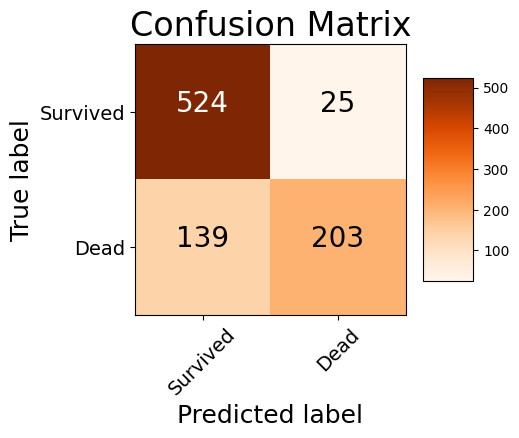

In [37]:
# plot the confusion matrix with number of misclasssified
cm = confusion_matrix(train['Survived'], pred)
matrix_plotter = Matrix(cm, classes = ['Survived', 'Dead'], title= 'Confusion Matrix')
matrix_plotter.plot_confusion_matrix()

Now, We will used **Receiver Operation Characteristic (ROC)** and **Area Under Curve(AUC)** to visualize the performance trade-off between sensitivity and specificity of the model provides a summary statistic

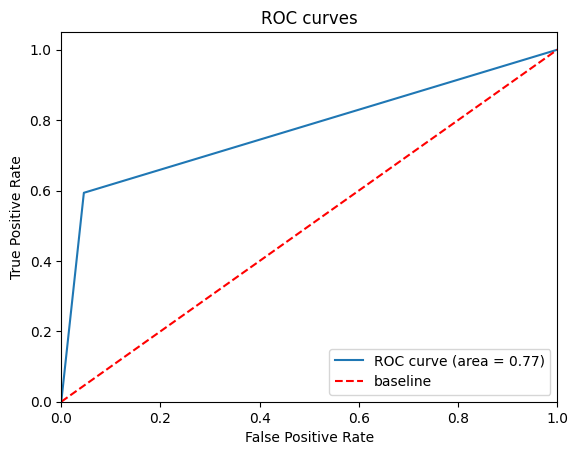

In [38]:
fpr, tpr, threshold =  metrics.roc_curve(train['Survived'], pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'r--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.show()

The result looks interesting and can be considerate as minimal reference for the other models

 Let's apply **Support Vector Machines (SVM)**, which is a kind of supervised learning using in regression task, where the goal is to optimize the learning function f from observation of a set  of {xi} (i=1,n) and {yi}(i=1,n) => y = f(xi) + &i, where &i as noise

Misclassification erro :  9.32 %


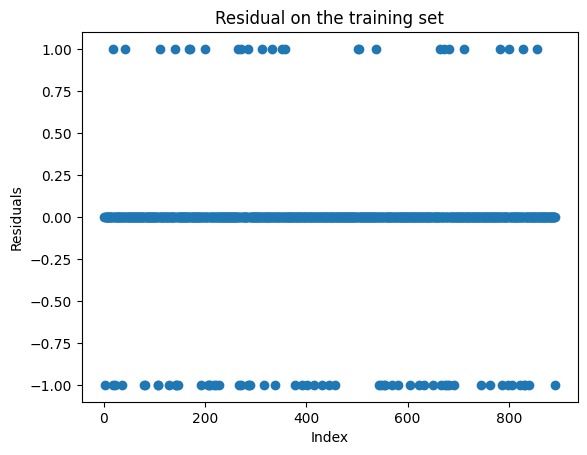

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC

# create a pipeline to create features, scale data and fit the model

polynomial_svm_clf = Pipeline(
    (
        ("poly_features", PolynomialFeatures(degree=3)),        
        ("scalar", StandardScaler()),
        ("svm_clf", SVC(kernel='poly', degree=10, coef0=1, C=5))
    )
)

polynomial_svm_clf.fit(train.drop(['Survived'], axis=1), train['Survived'])

#make residual to the model
pred = polynomial_svm_clf.predict(train.drop(['Survived'], axis =1))
res = pred - train['Survived']

plt.plot(res,  'o')
plt.title('Residual on the training set')
plt.xlabel('Index')
plt.ylabel('Residuals')

# print misclassification
print('Misclassification erro : ',  round(1 - metrics.accuracy_score(train['Survived'], pred),4)*100,'%')